# 신경망 모델 훈련

* 사이킷런의 머신러닝 알고리즘은 좋은 성능을 내기 위해서 매개변수를 조정하고 훈련을 반복한다. 
* 이런 알고리즘은 모델의 구조가 고정되어 있다고 느낄 수 있다. 
* 반면 딥러닝에서는 모델의 구조를 직접 만든다는 느낌이 훨씬 강하다. 
* 층을 추가하고, 층에 있는 뉴런의 갯수, 활성화 함수를 결정할 일들이 많다. 

## 손실 곡선

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split

In [2]:

#데이터 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#데이터 전처리
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화

#훈련, 검증 데이터 세트 분할
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)


In [10]:
#함수로 만들기


def model_fn(a_layer=None):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [11]:
model = model_fn()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

epoch_hist = model.fit(train_scaled, y_train, epochs=5) 

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5219 - accuracy: 0.8172
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3468 - accuracy: 0.8732
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3242 - accuracy: 0.8812
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.8889


In [6]:
 # 훈련 측정값
print(epoch_hist.history.keys())

dict_keys(['loss', 'accuracy'])


In [7]:
epoch_hist.history['loss']

[0.521922767162323,
 0.3903851807117462,
 0.34679651260375977,
 0.32419878244400024,
 0.3036555051803589]

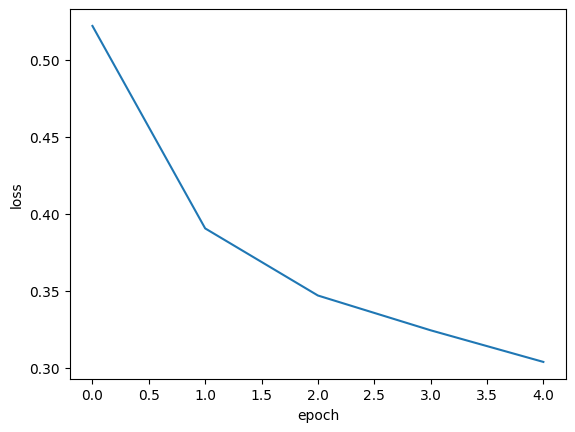

In [8]:
import matplotlib.pyplot as plt

#손실함수 값
plt.plot(epoch_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

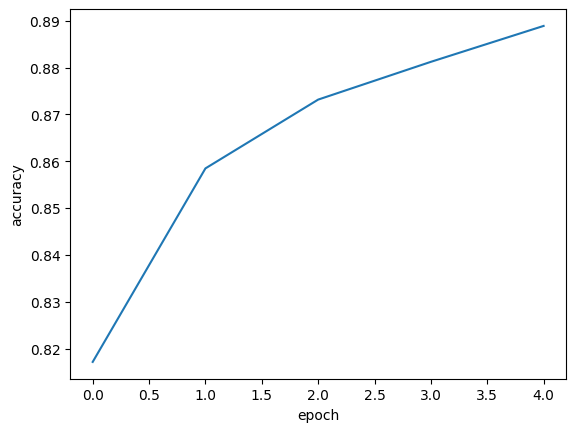

In [9]:
#정확도 그래프
plt.plot(epoch_hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

> * 역시 에포크 마다 정확도가 올라간다. <br>
> * 에포크를 더 많이 해야겠다. 
> * 인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 **손실함수**입니다. 

## epoch:20 일때 손실함수

In [13]:
# 에포크 20으로 증가
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


epoch_hist = model.fit(train_scaled, y_train, epochs=20) 



Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5259 - accuracy: 0.8181
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3992 - accuracy: 0.8567
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3558 - accuracy: 0.8714
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3305 - accuracy: 0.8801
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3100 - accuracy: 0.8860
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.8917
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2854 - accuracy: 0.8938
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.9003
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2613 - accuracy: 0.9023
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.251

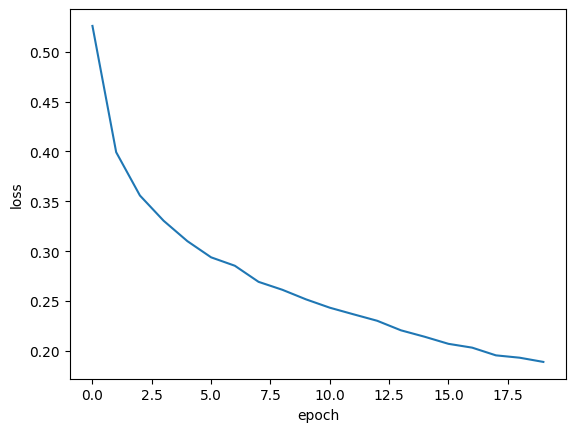

In [14]:
#손실함수 값
plt.plot(epoch_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

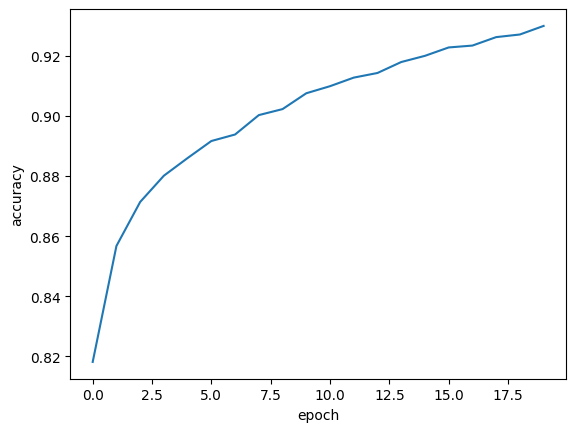

In [15]:
#정확도 그래프
plt.plot(epoch_hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

* 경사 하강법을 사용했을 때 과대/과소 적합과 에포크 사이의 관계를 알아봤다. 
* 인공신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 적용된다. 

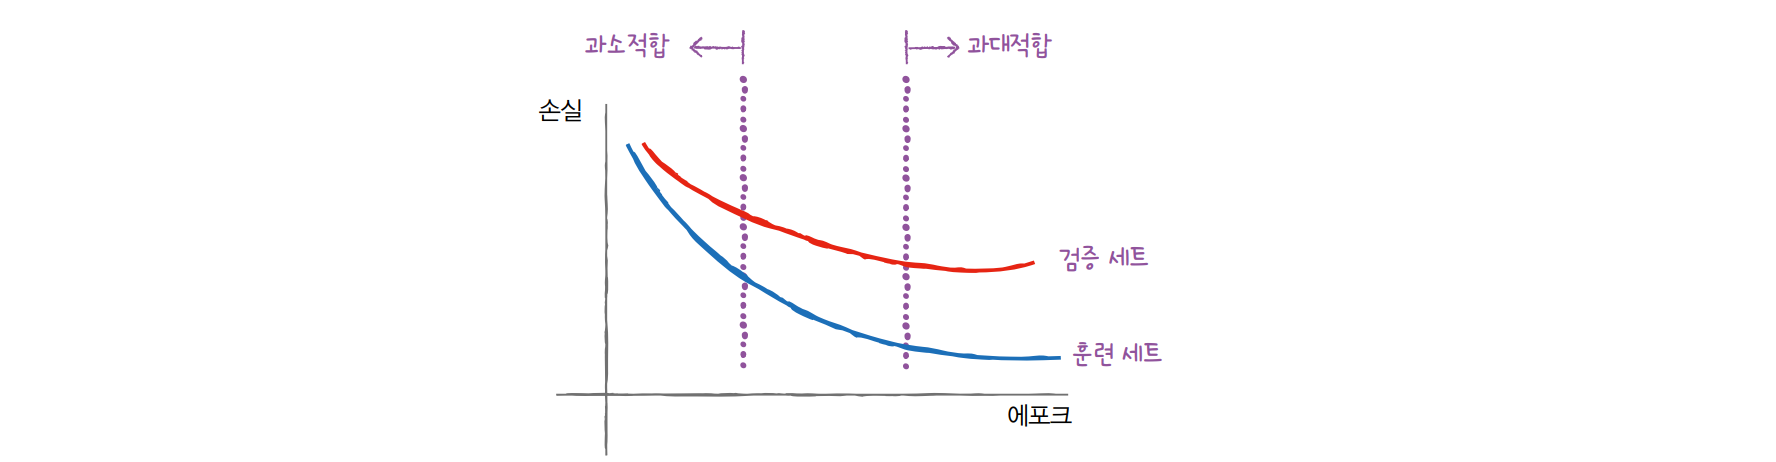

In [17]:

# 검증용 데이터 세트를 튜플로 전달한다.
model = model_fn()

model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics='accuracy')


epoch_hist = model.fit(train_scaled, y_train, epochs=20, batch_size = 50,
                        validation_data = (val_scaled,y_val)) 



Epoch 1/20
960/960 [==============================] - 3s 3ms/step - loss: 0.5453 - accuracy: 0.8084 - val_loss: 0.4451 - val_accuracy: 0.8382
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3961 - accuracy: 0.8563 - val_loss: 0.3967 - val_accuracy: 0.8568
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3537 - accuracy: 0.8711 - val_loss: 0.3696 - val_accuracy: 0.8666
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3297 - accuracy: 0.8808 - val_loss: 0.3594 - val_accuracy: 0.8693
Epoch 5/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3132 - accuracy: 0.8866 - val_loss: 0.3476 - val_accuracy: 0.8767
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2989 - accuracy: 0.8907 - val_loss: 0.3322 - val_accuracy: 0.8824
Epoch 7/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2867 - accuracy: 0.8956 - val_loss: 0.3364 - val_accuracy: 0.8811
Epoch 

In [19]:
epoch_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

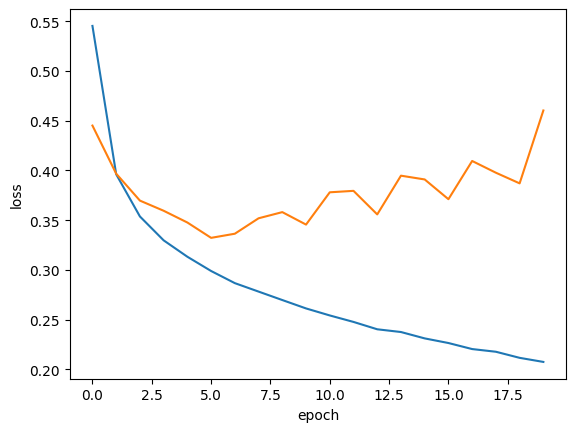

In [20]:
#손실함수 값
plt.plot(epoch_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(epoch_hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

> * 실행결과가 달라질 수 있음 
> * 초기에 검증 손실이 감소하다가 3번째 에포크만에 다시 상승하기 시작한다.
> * 훈련 손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어 집니다. 
> * 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라
> * 검증 세트에 대한 정확도도 증가할 것 같다.


## 딥러닝에서의 과대적합 해결

과대적합을 막는 가장 간단한 방법은 모델의 규모를 축소하는 것입니다. 즉, 모델에 있는 학습 가능한 파라미터의 수를 줄입니다(모델 파라미터는 층(layer)의 개수와 층의 유닛(unit) 개수에 의해 결정됩니다). 딥러닝에서는 모델의 학습 가능한 파라미터의 수를 종종 모델의 "용량"이라고 말합니다. 직관적으로 생각해 보면 많은 파라미터를 가진 모델이 더 많은 "기억 용량"을 가집니다. 이런 모델은 훈련 샘플과 타깃 사이를 일반화 능력이 없는 딕셔너리와 같은 매핑으로 완벽하게 학습할 수 있습니다. 하지만 이전에 본 적 없는 데이터에서 예측을 할 땐 쓸모가 없을 것입니다.

반면에 네트워크의 기억 용량이 부족하다면 이런 매핑을 쉽게 학습할 수 없을 것입니다. 손실을 최소화하기 위해서는 예측 성능이 더 많은 압축된 표현을 학습해야 합니다. 또한 너무 작은 모델을 만들면 훈련 데이터를 학습하기 어렵울 것입니다. "너무 많은 용량"과 "충분하지 않은 용량" 사이의 균형을 잡아야 합니다.

안타깝지만 어떤 모델의 (층의 개수나 뉴런 개수에 해당하는) 적절한 크기나 구조를 결정하는 마법같은 공식은 없습니다. 여러 가지 다른 구조를 사용해 실험을 해봐야만 합니다.

알맞은 모델의 크기를 찾으려면 비교적 적은 수의 층과 파라미터로 시작해서 검증 손실이 감소할 때까지 새로운 층을 추가하거나 층의 크기를 늘리는 것이 좋습니다. 

## 옵티마이저 종류와 성능

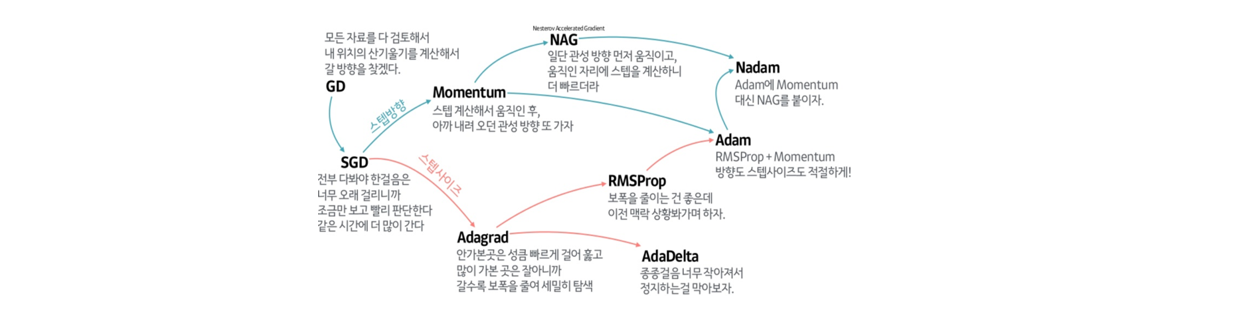

<center>
<img src="https://mlfromscratch.com/content/images/2019/12/saddle.gif" width="400" height="300"  />
</center>




## 과대적합 방지: 옵티마이저 조정

In [21]:
# 옵티마이저 Adadelta사용해보기
model = model_fn()

model.compile(optimizer='Adadelta', loss='sparse_categorical_crossentropy', metrics='accuracy')


epoch_hist = model.fit(train_scaled, y_train, epochs=20, batch_size = 50,
                        validation_data = (val_scaled,y_val)) 

Epoch 1/20
960/960 [==============================] - 3s 3ms/step - loss: 2.3450 - accuracy: 0.1048 - val_loss: 2.1968 - val_accuracy: 0.1269
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 2.0851 - accuracy: 0.1894 - val_loss: 1.9825 - val_accuracy: 0.2617
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 1.8924 - accuracy: 0.3394 - val_loss: 1.8114 - val_accuracy: 0.4124
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 1.7336 - accuracy: 0.5017 - val_loss: 1.6674 - val_accuracy: 0.5526
Epoch 5/20
960/960 [==============================] - 2s 3ms/step - loss: 1.5996 - accuracy: 0.6011 - val_loss: 1.5467 - val_accuracy: 0.6148
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 1.4870 - accuracy: 0.6380 - val_loss: 1.4450 - val_accuracy: 0.6373
Epoch 7/20
960/960 [==============================] - 2s 3ms/step - loss: 1.3911 - accuracy: 0.6555 - val_loss: 1.3580 - val_accuracy: 0.6497
Epoch 

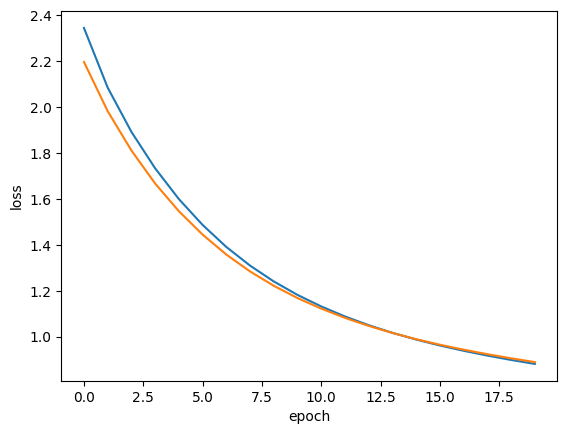

In [22]:
#손실함수 값
plt.plot(epoch_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(epoch_hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
# 옵티마이저 Adam 사용하기
model = model_fn()

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


epoch_hist = model.fit(train_scaled, y_train, epochs=20, batch_size = 50,
                        validation_data = (val_scaled,y_val)) 

Epoch 1/20
960/960 [==============================] - 3s 3ms/step - loss: 0.5410 - accuracy: 0.8122 - val_loss: 0.4359 - val_accuracy: 0.8458
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 0.4065 - accuracy: 0.8550 - val_loss: 0.4043 - val_accuracy: 0.8578
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3622 - accuracy: 0.8698 - val_loss: 0.3600 - val_accuracy: 0.8713
Epoch 4/20
960/960 [==============================] - 2s 3ms/step - loss: 0.3358 - accuracy: 0.8767 - val_loss: 0.3678 - val_accuracy: 0.8674
Epoch 5/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3132 - accuracy: 0.8849 - val_loss: 0.3379 - val_accuracy: 0.8784
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3019 - accuracy: 0.8899 - val_loss: 0.3368 - val_accuracy: 0.8777
Epoch 7/20
960/960 [==============================] - 2s 2ms/step - loss: 0.2858 - accuracy: 0.8937 - val_loss: 0.3342 - val_accuracy: 0.8775
Epoch 

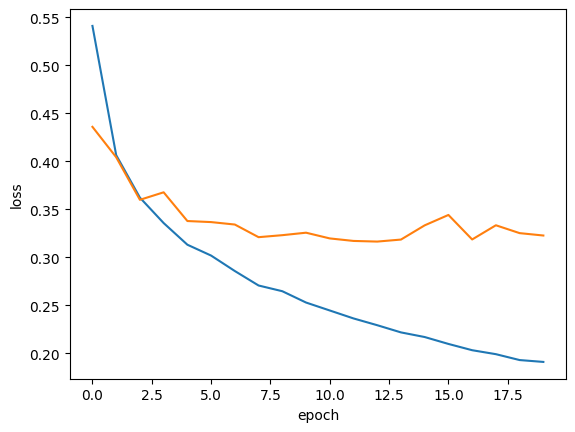

In [24]:
#손실함수 값
plt.plot(epoch_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(epoch_hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



> 검증 손실 그래프에 여전히 요동이 있지만 10번째 에포크까지 감소 추세가 이어지고 있다. <br>
> Adam 옵티마이저가 이 데이터 셋에 잘 맞는다는 것을 보여준다. <br>
> 더 나은 곡선을 얻기위해서는 학습률을 조정에 도전!!


## 과대적합 방지: 옵티마이저 조정 + 학습률 튜닝

In [41]:
model = model_fn()

adam = keras.optimizers.Adam(learning_rate=0.01) # default : 0.001

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


epoch_hist = model.fit(train_scaled, y_train, epochs=6,
                        validation_data = (val_scaled,y_val)) 

Epoch 1/6
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5280 - accuracy: 0.8165 - val_loss: 0.4066 - val_accuracy: 0.8537
Epoch 2/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3931 - accuracy: 0.8587 - val_loss: 0.3757 - val_accuracy: 0.8645
Epoch 3/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3523 - accuracy: 0.8718 - val_loss: 0.3567 - val_accuracy: 0.8692
Epoch 4/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3279 - accuracy: 0.8793 - val_loss: 0.3455 - val_accuracy: 0.8771
Epoch 5/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3078 - accuracy: 0.8856 - val_loss: 0.3313 - val_accuracy: 0.8772
Epoch 6/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.8912 - val_loss: 0.3277 - val_accuracy: 0.8802


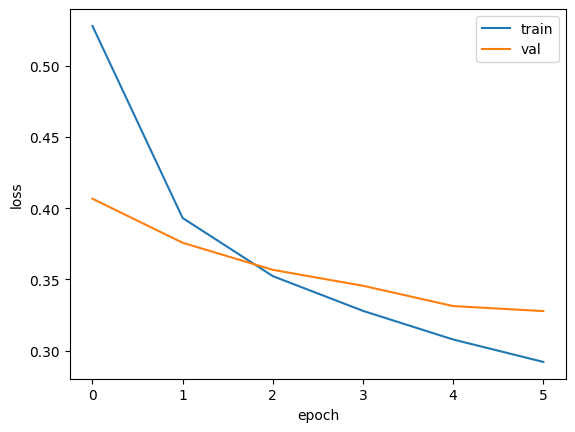

In [42]:
#손실함수 값
plt.plot(epoch_hist.history['loss'], label='train')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(epoch_hist.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

> 학습률 조정이 과대적합을 방지할 수 있지만, 적정한 튜닝값을 찾기에 쉽지 않다.

## 드롭아웃

* 랜덤하게 은닉층의 뉴런이 드롭아웃된다. 
* 드롭아웃은 과대적합을 막는다. 
* 이전 층의 뉴런이 랜덤하게 꺼지면서 특정 뉴런에 과대하게 의존하는 것을 줄이고, 모든 입력에 대해 주의를 기울여야 하기 때문이다. 

* 마치 2개의 신경망을 앙상블 하는 것과 같다. 
* 앙상블은 과대적합을 막는데 아주 좋은 기법이다. 


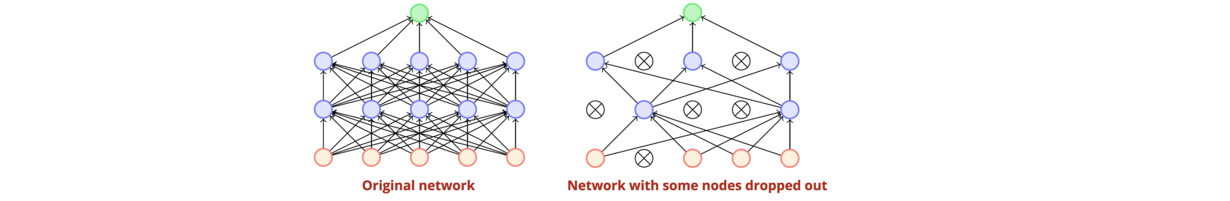

<center>
<img src="http://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif" width="400" height="300"  />
</center>

In [46]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수
model.add(Dropout(0.3)) #층 하나를 추가하고, 30%정도를 드롭아웃한다. 즉 훈련되는 파라미터가 없도록
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')


history = model.fit(train_scaled, y_train, epochs=20,
                    validation_data=(val_scaled, y_val)) 

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5934 - accuracy: 0.7922 - val_loss: 0.4212 - val_accuracy: 0.8485
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4406 - accuracy: 0.8424 - val_loss: 0.3834 - val_accuracy: 0.8622
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4058 - accuracy: 0.8520 - val_loss: 0.3904 - val_accuracy: 0.8533
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3842 - accuracy: 0.8603 - val_loss: 0.3667 - val_accuracy: 0.8650
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8651 - val_loss: 0.3629 - val_accuracy: 0.8655
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3559 - accuracy: 0.8683 - val_loss: 0.3434 - val_accuracy: 0.8724
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3453 - accuracy: 0.8730 - val_loss: 0.3388 - val_accuracy:

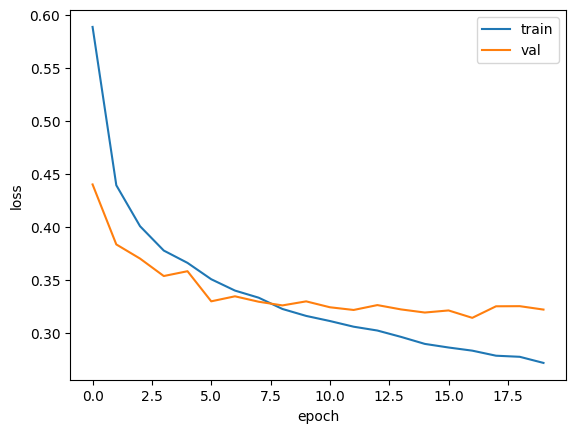

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

> 과대적합이 확실이 많이 줄었다. 
>  에포크 10회 이상이 되더라도 다소 검증 손실의 감소 추세가 떨어지기는 했지만 그래도 크게 상승하지는 않고 어느 정도 유지되고 있다. 

>  적정한 에포크 횟수를 알았으니 10회로 훈련해야겠다. 

## 모델 저장과 복원

In [52]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수

model.add(Dropout(0.3)) # 층 하나를 추가한다. 30%정도를 드롭아웃한다.  훈련되는 파라미터는 없다. 검증시에는 드롭아웃 하지 않고, 훈련시에만 드롭아웃 기능 사용
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [53]:
#에포크 10회로 조정
history = model.fit(train_scaled, y_train, epochs=10,verbose=0,
                    validation_data=(val_scaled, y_val)) 

In [54]:
 #훈련된 모델의 파라미터를 저장함
model.save_weights('./model/mnist_fashion_weights.h5')

In [55]:
#모델 구조와 모델 파라미터를 함께 저장 HDF5 포맷으로 저장
model.save('./model/mnist_fashion_weights.h5')

## 모델 복원: 가중치 활용

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [57]:
# 훈련하지 않은 새로운 모델에 저장해둔 파라미터들을 적재해서 

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수

model.add(Dropout(0.3)) # 층 하나를 추가한다. 30%정도를 드롭아웃한다.  훈련되는 파라미터는 없다. 검증시에는 드롭아웃 하지 않고, 훈련시에만 드롭아웃 기능 사용
model.add(Dense(10, activation='softmax'))



In [58]:
model.load_weights('./model/mnist_fashion_weights.h5')

In [59]:
#데이터 로드
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#데이터 전처리
train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화

#훈련, 검증 데이터 세트 분할
train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)


In [63]:
# 예측
pred = model.predict(val_scaled)

375/375 [==============================] - 1s 2ms/step


In [64]:
# 10개 클래스에 대한 확률이 들어 있다. 


array([2.7487927e-11, 3.1238704e-14, 2.6877838e-13, 6.9180924e-13,
       1.0230102e-10, 1.0403652e-07, 9.9493256e-14, 9.8945546e-11,
       9.9999988e-01, 6.8884140e-13], dtype=float32)

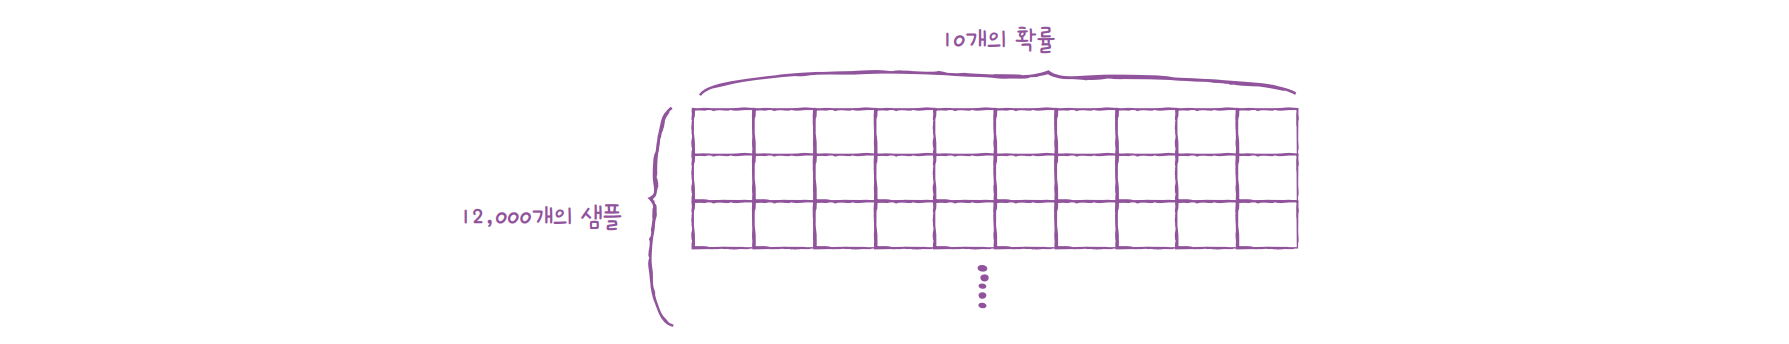

In [65]:
#10개의 클래스에 대한 예측 확률
pred[0]

array([2.7487927e-11, 3.1238704e-14, 2.6877838e-13, 6.9180924e-13,
       1.0230102e-10, 1.0403652e-07, 9.9493256e-14, 9.8945546e-11,
       9.9999988e-01, 6.8884140e-13], dtype=float32)

In [72]:
#가장 큰 값이 있는 인덱스, 8인덱스의 클래스


8

In [73]:
# 10개중에 가장 큰 값




375/375 [==============================] - 0s 753us/step


array([8, 8, 7, ..., 8, 8, 6], dtype=int64)

In [74]:
#예측값과 실제값 비교


(4, 4)

array([ True,  True,  True, ...,  True,  True, False])

In [77]:
 #예측값과 실제값이 맞은 평균


0.8783333333333333

### 모델 재활용

In [78]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

train_scaled = X_train / 255.0 # 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화

train_scaled, val_scaled, y_train, y_val = train_test_split(train_scaled, y_train, test_size=0.2, random_state=42)



In [81]:
X_test_scaled =  X_test/255.0

model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 920us/step - loss: 0.3570 - accuracy: 0.8736


[0.3570030629634857, 0.8736000061035156]

In [83]:
import numpy as np

test_labels = np.argmax(model.predict(X_test_scaled), axis=-1)
test_labels[3],y_test[3] #예측값과 실제값 비교

313/313 [==============================] - 0s 884us/step


(1, 1)

## 콜백과 조기종료

* 콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체입니다. 


* ModelCheckpoint
    * 최상의 검증 점수를 낸 그 순간의 가중치를 자동으로 저장해 줍니다. 
* EarlyStopping
    * 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료라고 합니다.
    * 에포크가 남아있어도 학습을 중단해 줍니다. 


* 그러면 자원을 아낄 수 있습니다.
* 조기 종료는 에포크 횟수를 제한하는 역할도 하지만
* 모델이 과적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수 있습니다. 


In [86]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #플래튼 층 reshape() 대신 사용하면 편리 -> 층으로 카운트 하진 않음
model.add(Dense(100, activation='relu')) #렐루함수

model.add(Dropout(0.3)) # 층 하나를 추가한다. 30%정도를 드롭아웃한다.  훈련되는 파라미터는 없다. 검증시에는 드롭아웃 하지 않고, 훈련시에만 드롭아웃 기능 사용
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(train_scaled, y_train, epochs=20, verbose=1,
                    validation_data=(val_scaled, y_val))

In [88]:
# 몇 번째 에포크에서 훈련이 중지 되었는지..


7


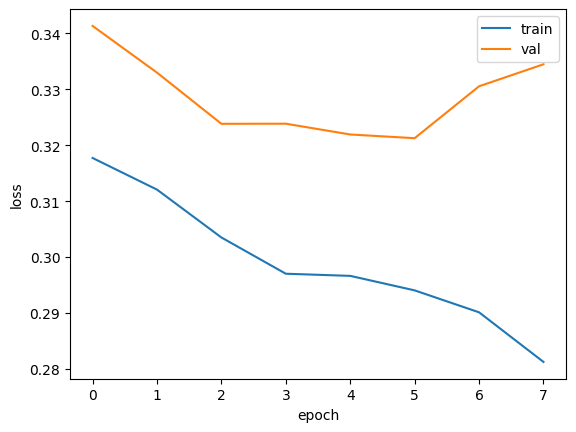

In [91]:
# 최적의 상태일 때 모델을 저장해주기 때문에 검증 세트로 확인


313/313 [==============================] - 0s 939us/step - loss: 0.3555 - accuracy: 0.8791


[0.355545312166214, 0.8791000247001648]

# 종합코드

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.7640 - val_loss: 0.4684 - val_accuracy: 0.8366
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.8368 - val_loss: 0.4075 - val_accuracy: 0.8568
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8488 - val_loss: 0.3847 - val_accuracy: 0.8629
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.8602 - val_loss: 0.3672 - val_accuracy: 0.8671
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8641 - val_loss: 0.3618 - val_accuracy: 0.8700
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8696 - val_loss: 0.3449 - val_accuracy: 0.8755
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3512 - accuracy: 0.8730 - val_loss: 0.3415 - val_accuracy: 0.8762
Epoch 

[0.3194139301776886, 0.8824166655540466]

In [26]:
X_test_scaled = X_test / 255.0

model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 995us/step - loss: 0.3445 - accuracy: 0.8754


[0.34445440769195557, 0.8754000067710876]

## 심화

* Dense층의 개수를 늘리고, 그 안의 units 개수를 조정하여 성능향상을 시도하세요.
* 배치 사이즈를 조정하여 성능향상을 시도하세요.